### **1. Importing dataset and libraries** ###

In [1]:
# from google.colab import drive
# drive.mount ('/content/drive')

In [3]:
import pandas as pd
# path = "/content/drive/MyDrive/Drug Test - Deep Learning/drug-train new 2-8.xlsx"
path = "drug-train new 2-8.xlsx"
df_train = pd.read_excel(path)
df_train.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",3,2015-03-14,32
1,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",3,2017-03-09,54
2,212077,Lamotrigine,Bipolar Disorde,"""I&#039;ve been on every medicine under the su...",3,2014-11-09,18
3,119705,Nilotinib,Chronic Myelogenous Leukemia,"""I have been on Tasigna for just over 3 years ...",3,2015-09-01,11
4,231466,Trazodone,Insomnia,"""I have insomnia, it&#039;s horrible. My story...",3,2016-04-03,43
5,41928,Etanercept,Rheumatoid Arthritis,"""I live in Western Australia and disturbed by ...",3,2017-09-16,4
6,206180,Eflornithine,Hirsutism,"""I&#039;m writing a second review on Vaniqa. ...",3,2014-05-11,99
7,78563,Daytrana,ADHD,"""Hi all, My son who is 12 was diagnosed when h...",3,2017-01-12,11
8,51452,Azithromycin,NaN,"""Very good response. It is so useful for me. """,3,2010-08-18,1
9,204999,Toradol,Pain,"""I am 30 years old. I had a multiple composite...",3,2013-02-11,16


In [4]:
# path = "/content/drive/MyDrive/Drug Test - Deep Learning/drug-test new 2-8.xlsx"
path = "drug-test new 2-8.xlsx"
df_test = pd.read_excel(path)
df_test.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",3,2012-02-28,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",3,2009-05-17,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",3,2017-09-29,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",3,2017-03-05,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",3,2015-10-22,4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",2,2014-07-03,13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",2,2016-06-06,1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",3,2009-04-21,32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",2,2016-10-18,21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",1,2011-04-16,3


In [6]:
# Preprocessing packages
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tarpa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tarpa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tarpa\AppData\Roaming\nltk_data...


### **2. Understanding the data** ###

#### **2.1. Training data** ####

In [7]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",3,2015-03-14,32
1,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",3,2017-03-09,54
2,212077,Lamotrigine,Bipolar Disorde,"""I&#039;ve been on every medicine under the su...",3,2014-11-09,18
3,119705,Nilotinib,Chronic Myelogenous Leukemia,"""I have been on Tasigna for just over 3 years ...",3,2015-09-01,11
4,231466,Trazodone,Insomnia,"""I have insomnia, it&#039;s horrible. My story...",3,2016-04-03,43


In [8]:
df_train = df_train[['review','rating']]
df_train.head(1)

,review,rating
0,"""Abilify changed my life. There is hope. I was...",3


In [9]:
df_train.describe()

,rating
count,161297.000000
mean,2.386535
std,0.819691
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


In [10]:
df_train['rating'].unique()

array([3, 2, 1], dtype=int64)

In [11]:
print(df_train[df_train['rating'] == 3].count())
print(df_train[df_train['rating'] == 2].count())
print(df_train[df_train['rating'] == 1].count())

review    97410
rating    97410
dtype: int64
review    28824
rating    28824
dtype: int64
review    35063
rating    35063
dtype: int64


([<matplotlib.axis.XTick at 0x21df476b1c0>,
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

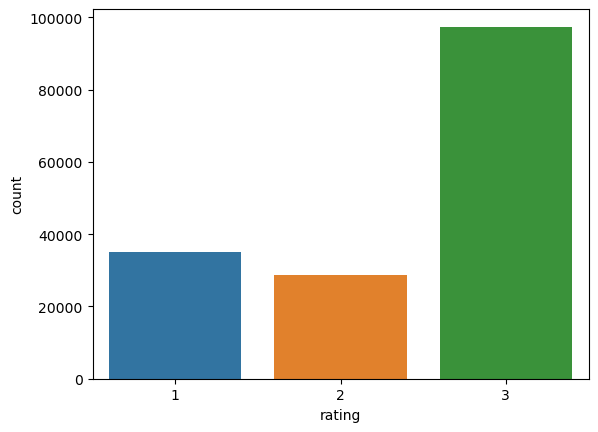

In [12]:
sns.countplot(data=df_train,x='rating')
plt.xticks(ticks=[0,1,2],labels=['1','2','3'])

In [13]:
X_train = df_train[['review']]
Y_train = df_train[['rating']]

*NOTE: The data is highly imbalanced. We need to convert the texts into vectors and balance it accordingly.*

In [14]:
X_train.describe()

,review
count,161297
unique,112329
top,"""Good"""
freq,33


#### **2.2. Testing data** ####

In [15]:
df_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",3,2012-02-28,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",3,2009-05-17,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",3,2017-09-29,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",3,2017-03-05,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",3,2015-10-22,4


In [16]:
df_test = df_test[['review','rating']]
df_test.head(1)

,review,rating
0,"""I&#039;ve tried a few antidepressants over th...",3


In [17]:
df_test.describe()

,rating
count,53766.000000
mean,2.381486
std,0.822387
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


In [18]:
df_test['rating'].unique()

array([3, 2, 1], dtype=int64)

In [19]:
print(df_test[df_test['rating'] == 3].count())
print(df_test[df_test['rating'] == 2].count())
print(df_test[df_test['rating'] == 1].count())

review    32349
rating    32349
dtype: int64
review    9579
rating    9579
dtype: int64
review    11838
rating    11838
dtype: int64


([<matplotlib.axis.XTick at 0x21df4a77b80>,
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

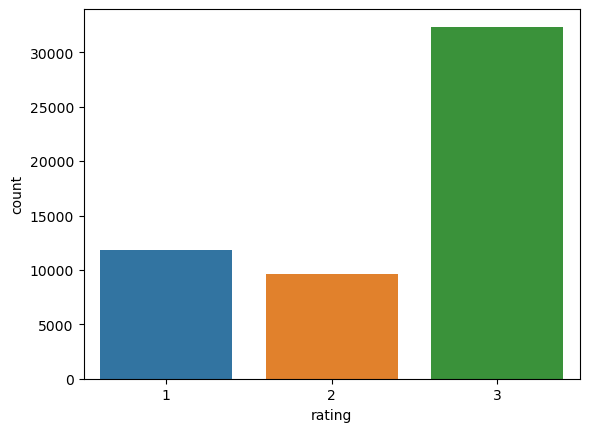

In [20]:
sns.countplot(data=df_test,x='rating')
plt.xticks(ticks=[0,1,2],labels=['1','2','3'])

In [21]:
X_test = df_test[['review']]
Y_test = df_test[['rating']]

*NOTE: The data is highly imbalanced. We need to convert the texts into vectors and balance it accordingly.*

### **3. Text Preprocessing** ###

In [22]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tarpa\AppData\Roaming\nltk_data...


True

In [23]:
def clean_text(text):
    """
    Data Preprocessing is done here.
    """

    # Step 1 -  Lowering the cases
    text = text.lower()

    # Step 2 - remove urls and '
    text = re.sub(r"http\S+|www\S+|https\S+", "URL",text,flags = re.MULTILINE)
    text = re.sub(r"039", "",text,flags = re.MULTILINE)

    # Step 3 - remove punctuations
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Step 4 - remove @ and #
    text = re.sub(r'\@',"USER",text)
    text = re.sub(r'\#', "", text)

    # Step 5 - remove extra charaters in each word (more than 2 continuous ones)
    repeat_char = re.compile(r"(.)\1{1,}", re.IGNORECASE)
    text = repeat_char.sub(r"\1\1", text)
    text = re.sub("(.)\\1{2,}", "\\1", text)

    # Step 6 - remove tokens
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stopwords]

    # Step 7 - Lemmatizing
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in tokens]
        
    return " ".join(lemma_words)

df_train['review'] = [clean_text(text) for text in df_train['review']]
df_test['review'] = [clean_text(text) for text in df_test['review']]

In [24]:
df_train.head()

,review,rating
0,abilify changed life hope zoloft clonidine fir...,3
1,taken antidepressants years improvement mostly...,3
2,ive every medicine sun seems manage hypomania ...,3
3,tasigna 3 years 300mg x 2 times day tasigna wo...,3
4,insomnia horrible story begins pcp prescribing...,3


In [25]:
df_train.tail(10)

,review,rating
161287,given spasms upper spine cervical region anaph...,1
161288,covered family pact california insertion painf...,1
161289,bystolic feet arms numb blood sugars became se...,1
161290,livalo two months change cholesterol levels st...,1
161291,switched portia 12 days ago started spotting a...,1
161292,poisontwo days med amp thought going die total...,1
161293,taken armour thyroid 20 years starting 2 years...,1
161294,used month ago allergic conjunctivitis thought...,1
161295,800mg seems work every 2nd day still excruciat...,1
161296,given iv surgey immediately became anxious cou...,1


In [26]:
df_test.tail(10)

,review,rating
53756,treatment adhd save life dont believe hype sti...,3
53757,3rd time taking medicine first 2 times shin bo...,3
53758,medicine kept sleeping whole 5 days body start...,1
53759,microgestin 3 years past year started get extr...,2
53760,started taking apri 7 months ago breats got no...,3
53761,taken tamoxifen 5 years side effects severe sw...,3
53762,ive taking lexapro escitaploprgram since febru...,3
53763,im married 34 years old kids taking pill hassl...,3
53764,prescribed nucynta severe neckshoulder pain ta...,1
53765,works,3


In [28]:
# online (Google Colab)
# df_train.to_csv('/content/drive/MyDrive/Drug Test - Deep Learning/train_text_preprocessed.csv')
# df_test.to_csv('/content/drive/MyDrive/Drug Test - Deep Learning/test_text_preprocessed.csv')

# offline
df_train.to_csv('train_text_preprocessed.csv')
df_train.to_csv('test_text_preprocessed.csv')

### **4. --Checkpoint--** ###

In [29]:
# from google.colab import drive
# drive.mount ('/content/drive')

In [30]:
import pandas as pd
# df_train = pd.read_csv("/content/drive/MyDrive/Drug Test - Deep Learning/train_text_preprocessed.csv")
# df_test = pd.read_csv("/content/drive/MyDrive/Drug Test - Deep Learning/test_text_preprocessed.csv")

df_train = pd.read_csv("train_text_preprocessed.csv")
df_test = pd.read_csv("test_text_preprocessed.csv")

In [31]:
# Model
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.optimizers import Adam

In [32]:
df_train.dropna(inplace=True)
df_train.head()

,Unnamed: 0,review,rating
0,0,abilify changed life hope zoloft clonidine fir...,3
1,1,taken antidepressants years improvement mostly...,3
2,2,ive every medicine sun seems manage hypomania ...,3
3,3,tasigna 3 years 300mg x 2 times day tasigna wo...,3
4,4,insomnia horrible story begins pcp prescribing...,3


In [33]:
df_test.dropna(inplace=True)
df_test.head()

,Unnamed: 0,review,rating
0,0,abilify changed life hope zoloft clonidine fir...,3
1,1,taken antidepressants years improvement mostly...,3
2,2,ive every medicine sun seems manage hypomania ...,3
3,3,tasigna 3 years 300mg x 2 times day tasigna wo...,3
4,4,insomnia horrible story begins pcp prescribing...,3


In [34]:
print("df_train counts: ", df_train.count())
print("df_test counts: ", df_test.count())

df_train counts:  Unnamed: 0    161291
review        161291
rating        161291
dtype: int64
df_test counts:  Unnamed: 0    161291
review        161291
rating        161291
dtype: int64


In [35]:
df_train['rating'].value_counts()

3    97404
1    35063
2    28824
Name: rating, dtype: int64

In [36]:
df_train = df_train[['review','rating']]
df_train.head(3)

,review,rating
0,abilify changed life hope zoloft clonidine fir...,3
1,taken antidepressants years improvement mostly...,3
2,ive every medicine sun seems manage hypomania ...,3


In [37]:
df_test = df_test[['review','rating']]
df_test.head(3)

,review,rating
0,abilify changed life hope zoloft clonidine fir...,3
1,taken antidepressants years improvement mostly...,3
2,ive every medicine sun seems manage hypomania ...,3


In [38]:
df_train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
161292    False
161293     True
161294     True
161295    False
161296     True
Length: 161291, dtype: bool

In [39]:
x_temp = df_train['review']
y_temp = df_train['rating']

In [40]:
x_temp1 = df_test['review']
y_temp1 = df_test['rating']

x_temp - train data texts<br>
y_temp - train data values
<br><br>
x_temp1 - test data texts<br>
y_temp1 - test data values

In [41]:
x_temp

0         abilify changed life hope zoloft clonidine fir...
1         taken antidepressants years improvement mostly...
2         ive every medicine sun seems manage hypomania ...
3         tasigna 3 years 300mg x 2 times day tasigna wo...
4         insomnia horrible story begins pcp prescribing...
                                ...                        
161292    poisontwo days med amp thought going die total...
161293    taken armour thyroid 20 years starting 2 years...
161294    used month ago allergic conjunctivitis thought...
161295    800mg seems work every 2nd day still excruciat...
161296    given iv surgey immediately became anxious cou...
Name: review, Length: 161291, dtype: object

In [42]:
y_temp

0         3
1         3
2         3
3         3
4         3
         ..
161292    1
161293    1
161294    1
161295    1
161296    1
Name: rating, Length: 161291, dtype: int64

In [43]:
x_temp1

0         abilify changed life hope zoloft clonidine fir...
1         taken antidepressants years improvement mostly...
2         ive every medicine sun seems manage hypomania ...
3         tasigna 3 years 300mg x 2 times day tasigna wo...
4         insomnia horrible story begins pcp prescribing...
                                ...                        
161292    poisontwo days med amp thought going die total...
161293    taken armour thyroid 20 years starting 2 years...
161294    used month ago allergic conjunctivitis thought...
161295    800mg seems work every 2nd day still excruciat...
161296    given iv surgey immediately became anxious cou...
Name: review, Length: 161291, dtype: object

In [44]:
y_temp1

0         3
1         3
2         3
3         3
4         3
         ..
161292    1
161293    1
161294    1
161295    1
161296    1
Name: rating, Length: 161291, dtype: int64

### **5. Texts to numbers** ###

#### **5.1 Converting y_temp to y_train and y_temp1 to y_test**####

In [45]:
y_temp = np.asarray(y_temp)

y_temp1 = np.asarray(y_temp1)

In [46]:
import numpy as np
y_temp = np.where(y_temp==3,0,y_temp)
y_temp = np.asarray(y_temp)
y_temp #After changing values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [47]:
y_temp1 = np.where(y_temp1==3,0,y_temp1)
y_temp1 = np.asarray(y_temp1)
y_temp1 #After changing values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

<strong><h3>So, values 1, 2 and 3 in ratings have been changed to 1, 2 and 0 respectively, for simplicity.<h3></strong>

In [48]:
num_classes = 3
y_train = to_categorical(y_temp, num_classes)
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [49]:
y_test = to_categorical(y_temp1, num_classes)
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

#### **6.2 Converting x_temp to x_train and x_temp1 to x_test**####

In [50]:
tk_review = Tokenizer(num_words=200000) #num_words says the number of top frequent words
tk_review.fit_on_texts(x_temp)
sequences_train = tk_review.texts_to_sequences(x_temp)
word_index = tk_review.word_index

In [51]:
V = len(word_index)
V

84317

In [52]:
sequences_train[0]

[874,
 240,
 38,
 224,
 362,
 2150,
 7,
 12,
 874,
 486,
 241,
 362,
 74,
 12199,
 1337,
 777,
 2039,
 898,
 51,
 261,
 2347,
 25,
 175,
 888,
 3203,
 253,
 2039,
 136,
 225,
 75,
 1498,
 874,
 282,
 19,
 15,
 1475,
 166,
 108,
 2,
 465,
 338,
 333,
 2900,
 108,
 874,
 63,
 62,
 16,
 112,
 777,
 51,
 928,
 44,
 22,
 7986,
 629,
 1161,
 171,
 843,
 14,
 91,
 215,
 3,
 121,
 15,
 158,
 99]

In [53]:
#Check input length...should be in same size
max = 0
for i in range(len(sequences_train)):
  word_number = len(sequences_train[i])
  if (word_number) > (max):
    max = word_number
print(max)

963


In [54]:
T=max

In [55]:
x_train = pad_sequences(sequences_train, padding = 'post', maxlen = max)
x_train[0]

array([  874,   240,    38,   224,   362,  2150,     7,    12,   874,
         486,   241,   362,    74, 12199,  1337,   777,  2039,   898,
          51,   261,  2347,    25,   175,   888,  3203,   253,  2039,
         136,   225,    75,  1498,   874,   282,    19,    15,  1475,
         166,   108,     2,   465,   338,   333,  2900,   108,   874,
          63,    62,    16,   112,   777,    51,   928,    44,    22,
        7986,   629,  1161,   171,   843,    14,    91,   215,     3,
         121,    15,   158,    99,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [56]:
sequences_test = tk_review.texts_to_sequences(x_temp1)
word_index = tk_review.word_index

In [57]:
x_test = pad_sequences(sequences_test, padding = 'post', maxlen = max)
x_test[0]

array([  874,   240,    38,   224,   362,  2150,     7,    12,   874,
         486,   241,   362,    74, 12199,  1337,   777,  2039,   898,
          51,   261,  2347,    25,   175,   888,  3203,   253,  2039,
         136,   225,    75,  1498,   874,   282,    19,    15,  1475,
         166,   108,     2,   465,   338,   333,  2900,   108,   874,
          63,    62,    16,   112,   777,    51,   928,    44,    22,
        7986,   629,  1161,   171,   843,    14,    91,   215,     3,
         121,    15,   158,    99,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [58]:
x_train.shape

(161291, 963)

In [59]:
y_train.shape

(161291, 3)

In [60]:
x_test.shape

(161291, 963)

In [61]:
y_test.shape

(161291, 3)

### **6. Preparing the model** ###

In [76]:
from keras.layers.pooling import GlobalMaxPooling1D
#Creating model

D = 20 # Dimension of Embedding layer
M = 15 # Dimension of LSTM layer

model = Sequential()
model.add(Embedding(V+1, D, input_length = x_train.shape[1]))
model.add(LSTM(M, return_sequences=True, recurrent_dropout=0.2))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [77]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 963, 20)           1686360   
                                                                 
 lstm_1 (LSTM)               (None, 963, 15)           2160      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 15)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 32)                512       
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,689,131
Trainable params: 1,689,131
Non-trainable params: 0
____________________________________________

In [78]:
# tf.keras.utils.plot_model(model, show_shapes = True)

In [79]:
y_test.shape

(161291, 3)

In [80]:
# training model
history = model.fit(x_train,y_train, epochs=5, verbose=1, validation_data = (x_test,y_test))

Epoch 1/5
5041/5041 [==============================] - 5041s 999ms/step - loss: 0.4017 - accuracy: 0.7209 - val_loss: 0.3222 - val_accuracy: 0.7797
Epoch 2/5
5041/5041 [==============================] - 5054s 1s/step - loss: 0.3265 - accuracy: 0.7784 - val_loss: 0.2722 - val_accuracy: 0.8227
Epoch 3/5
5041/5041 [==============================] - 5041s 1s/step - loss: 0.2859 - accuracy: 0.8114 - val_loss: 0.2442 - val_accuracy: 0.8471
Epoch 4/5
5041/5041 [==============================] - 4989s 990ms/step - loss: 0.2563 - accuracy: 0.8353 - val_loss: 0.2174 - val_accuracy: 0.8616
Epoch 5/5
5041/5041 [==============================] - 5051s 1s/step - loss: 0.2337 - accuracy: 0.8505 - val_loss: 0.2032 - val_accuracy: 0.8709


In [81]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


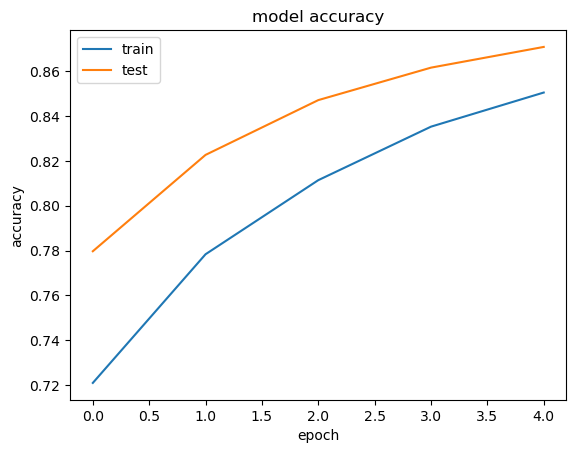

In [82]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

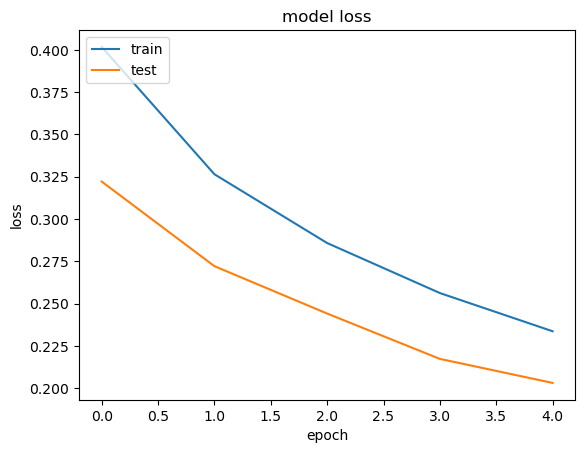

In [83]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **7. Predicting sentences** ###

In [105]:
a = ['i love it very much']
a = tk_review.texts_to_sequences(a)
a = np.array(a)
a = pad_sequences(a,padding='post',maxlen=max)
print(a.shape)
prediction = model.predict(np.array(a))
print(prediction[0][0].round(), prediction[0][1].round(), prediction[0][2].round())

(1, 963)
1/1 [==============================] - 0s 141ms/step
1.0 0.0 0.0


In [106]:
b = ['i detest it']
b = tk_review.texts_to_sequences(b)
b = np.array(b)
b = pad_sequences(b,padding='post',maxlen=max)
print(b.shape)
prediction = model.predict(np.array(b))
print(prediction[0][0].round(), prediction[0][1].round(), prediction[0][2].round())

(1, 963)
1/1 [==============================] - 0s 141ms/step
0.0 1.0 0.0


In [107]:
c = ['i ate it with great pleasure']
c = tk_review.texts_to_sequences(c)
c = np.array(c)
c = pad_sequences(c,padding='post',maxlen=max)
print(c.shape)
prediction = model.predict(np.array(c))
print(prediction[0][0].round(), prediction[0][1].round(), prediction[0][2].round())

(1, 963)
1/1 [==============================] - 0s 141ms/step
1.0 0.0 0.0


In [110]:
d = ['i dislike how bad the sofa feels but i like the design']
d = tk_review.texts_to_sequences(d)
d = np.array(d)
d = pad_sequences(d,padding='post',maxlen=max)
print(d.shape)
prediction = model.predict(np.array(d))
print(prediction[0][0].round(), prediction[0][1].round(), prediction[0][2].round())
print(prediction[0][0], prediction[0][1], prediction[0][2])

(1, 963)
1/1 [==============================] - 0s 187ms/step
0.0 1.0 0.0
0.12944452 0.764981 0.11588001


### **7. Exporting model** ###

In [117]:
model.save('Sentiment_analysis_Drug_test.h5')

### **8. Model Indormation** ###

In [122]:
# x_test_dummy = tk_review.texts_to_sequences(x_test)
# x_test_dummy = np.array(x_test_dummy)
# x_test_dummy = pad_sequences(x_test_dummy,padding='post',maxlen=max)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Predict probabilities for test set
# yhat_probs = model.predict(x_test_dummy, verbose=0)
yhat_probs = model.predict(x_test, verbose=0)
yhat_probs

yhat_classes = yhat_probs.round().astype(int)
yhat_classes

yhat_test = y_test

# Reduce to 1d array
yhat_test = yhat_test[:, 0]
yhat_classes = yhat_classes[:, 0]

# Accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yhat_test, yhat_classes)
print('Accuracy: %f' % accuracy)

# Precision tp / (tp + fp)
precision = precision_score(yhat_test, yhat_classes)
print('Precision: %f' % precision)

# Recall: tp / (tp + fn)
recall = recall_score(yhat_test, yhat_classes)
print('Recall: %f' % recall)

# F1 Score: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yhat_test, yhat_classes)
print('F1 score: %f' % f1)

# Confusion matrix
matrix = confusion_matrix(yhat_test, yhat_classes)
print(matrix)

Accuracy: 0.917491
Precision: 0.919197
Recall: 0.946583
F1 score: 0.932689
[[55782  8105]
 [ 5203 92201]]
